In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import pandas as pd
import math

In [2]:
data = pd.read_csv('../1.data-preparation/new-data/data_Y1.csv')
data.describe()

,MemberID,ClaimsTruncated,TARGET,trainset,age_05,age_15,age_25,age_35,age_45,age_55,...,drugCount_max,drugCount_min,drugCount_ave,drugcount_months,labCount_max,labCount_min,labCount_ave,labcount_months,labNull,drugNull
count,7.603700e+04,76037.000000,76037.000000,76037.0,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000,...,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000,76037.000000
mean,4.994795e+07,0.052225,0.467102,1.0,0.085866,0.090824,0.059405,0.096098,0.132935,0.112366,...,2.175033,0.968765,1.511600,3.703697,3.758749,2.178216,2.885066,1.580296,0.299999,0.344569
std,2.890149e+07,0.222481,1.612204,0.0,0.280168,0.287361,0.236383,0.294727,0.339507,0.315819,...,2.243436,1.046544,1.536634,4.089940,3.434990,2.533432,2.696510,1.814171,0.458260,0.475231
min,2.100000e+02,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.483922e+07,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.990758e+07,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,1.200000,2.000000,3.000000,1.000000,2.600000,1.000000,0.000000,0.000000
75%,7.510115e+07,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.285714,7.000000,6.000000,3.000000,4.800000,2.000000,1.000000,1.000000
max,9.999863e+07,1.000000,15.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,12.000000,10.000000,10.000000,10.000000,12.000000,1.000000,1.000000


In [3]:
data.drop("MemberID", axis = 1, inplace = True)
data.drop("Year", axis = 1, inplace = True)

X = data.loc[:, data.columns != 'TARGET']
y = data['TARGET']
y.describe()

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# scaler = MinMaxScaler()
# data[data.columns] = scaler.fit_transform(data[data.columns])
# data.head()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [5]:
def eval(model, X_test, y_test):
    pred_y = model.predict(X_test) # your predicted y values
    pred_y = pred_y.clip(min=0)
    pred_y = pred_y.astype(int)
    # The root mean square logarithmic error
    msle = np.mean( (np.log(pred_y + 1) - np.log(y_test + 1)) ** 2)
    rmsle = math.sqrt(msle)
    
    print ("RMSLE: %.4f" % rmsle)
    from sklearn.metrics import r2_score
    r2 = r2_score(pred_y, y_test)
    print ("R2 value: %.4f" % r2)

In [6]:
model_all= linear_model.LinearRegression()
model_all.fit(X_train, y_train)
eval(model_all, X_test, y_test)

RMSLE: 0.4974
R2 value: -15.6839


In [7]:
data_submit = pd.read_csv('../1.data-preparation/new-data/data_Y2.csv')
data_submit.describe()

,MemberID,ClaimsTruncated,TARGET,trainset,age_05,age_15,age_25,age_35,age_45,age_55,...,drugCount_max,drugCount_min,drugCount_ave,drugcount_months,labCount_max,labCount_min,labCount_ave,labcount_months,labNull,drugNull
count,7.143500e+04,71435.000000,71435.000000,71435.0,71435.000000,71435.000000,71435.000000,71435.000000,71435.000000,71435.000000,...,71435.000000,71435.000000,71435.000000,71435.000000,71435.000000,71435.000000,71435.000000,71435.000000,71435.000000,71435.000000
mean,4.993986e+07,0.056611,0.437895,1.0,0.088108,0.085364,0.057213,0.096563,0.136474,0.116232,...,2.207475,0.948695,1.516412,3.864030,3.879919,2.180024,2.937653,1.713670,0.282313,0.353090
std,2.894077e+07,0.231099,1.531780,0.0,0.283454,0.279425,0.232251,0.295364,0.343293,0.320505,...,2.281410,1.040350,1.559578,4.210155,3.421071,2.471471,2.640371,1.975234,0.450128,0.477934
min,4.000000e+00,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.477813e+07,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.995379e+07,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,1.222222,2.000000,4.000000,1.000000,3.000000,1.000000,0.000000,0.000000
75%,7.521986e+07,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.333333,8.000000,7.000000,3.000000,4.800000,2.000000,1.000000,1.000000
max,9.999882e+07,1.000000,15.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,12.000000,10.000000,10.000000,10.000000,12.000000,1.000000,1.000000


In [8]:
data_submit.drop("MemberID", axis = 1, inplace = True)
data_submit.drop("Year", axis = 1, inplace = True)

data_submit.head()

,ClaimsTruncated,TARGET,trainset,age_05,age_15,age_25,age_35,age_45,age_55,age_65,...,drugCount_max,drugCount_min,drugCount_ave,drugcount_months,labCount_max,labCount_min,labCount_ave,labcount_months,labNull,drugNull
0,0,1.0,1,1,0,0,0,0,0,0,...,1,1,1.0,2,2,2,2.0,1,0,0
1,0,1.0,1,0,0,0,0,0,0,0,...,1,1,1.0,5,0,0,0.0,0,1,0
2,0,0.0,1,0,0,0,0,0,0,1,...,0,0,0.0,0,6,4,5.0,2,0,1
3,0,0.0,1,0,0,0,1,0,0,0,...,0,0,0.0,0,0,0,0.0,0,1,1
4,0,0.0,1,0,0,0,0,0,0,1,...,0,0,0.0,0,3,3,3.0,1,0,1


In [9]:
y_submit = data_submit['TARGET']
X_submit = data_submit.loc[:, data_submit.columns != 'TARGET']
y_submit.describe()

count    71435.000000
mean         0.437895
std          1.531780
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: TARGET, dtype: float64

In [10]:
X_submit = scaler.transform(X_submit)

1st time: 0.5094

2nd time: 0.5078

3rd time: 0.5065

4nd time: 0.4891

5nd time: 0.4850

In [11]:
eval(model_all, X_submit, y_submit)

RMSLE: 0.4850
R2 value: -11.2757


In [12]:
data = pd.read_csv('../1.data-preparation/new-data/data_Y2.csv')
pred_y = model_all.predict(X_submit)

submission = pd.DataFrame()
submission['MemberID'] = data['MemberID']
submission['DIH'] = pred_y.astype(int)
submission.head()
submission.to_csv('./linear.csv')

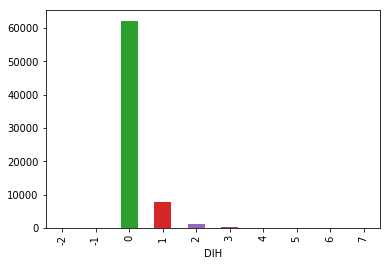

In [13]:
submission.groupby(['DIH']).size().plot.bar()

In [14]:
submission.groupby(['DIH']).size()

DIH
-2        1
-1       13
 0    62218
 1     7736
 2     1268
 3      165
 4       22
 5        8
 6        2
 7        2
dtype: int64